In [2]:
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.style as style
from sklearn.decomposition import PCA

In [129]:
import sys
!{sys.executable} -m pip install umap-learn fastcluster

In [2]:
"""
Read orthofinder orthogroups, keep track of two relationships:
 1) Gene ID --> Orthogroup ID
 2) Species ID --> Orthogroup ID --> Gene IDs
"""
prefixes = dict(
    arath = 'AT',
    eucgr = 'Eucgr',
    glyma = 'Glyma',
    medtr = 'Medtr',
    poptr = 'Potri',
    paran = 'Pan',
    zizju = 'zizju',
    cucsa = 'Cucsa'
)

gene_og = {}
og_sp_genes = defaultdict(lambda: defaultdict(list))

with open('./orthogroups/mcl/OrthoFinder_graph.gene_names.I25.txt') as filehandle:
    for i, line in enumerate(filehandle):
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        og = str(i)
        for gene in parts:
            gene_og[gene] = og
            for sp,prefix in prefixes.items():
                if gene.startswith(prefix):
                    og_sp_genes[og][sp].append(gene) 

In [3]:
%%time
species = ['medtr','paran', 'poptr', 'zizju', 'cucsa', 'glyma', 'arath']
#species = ['medtr','paran', 'zizju', 'cucsa']

def get_og_df(species):
    print(species)
    df = pd.read_csv(f'./{species}/{species}.tpm.tsv', index_col = 0, sep = '\t')
    #make indices for orthogroups
    new_index = pd.MultiIndex.from_arrays(
        (
            df.index, 
            [gene_og.get(g, 'None') for g in df.index]
        ), 
        names = ['geneId', 'orthogroupId'])
    '''binary_df.index = new_index'''
    df.index = new_index

    #make orthogroup df, take sum of tpms
    og_df = df.groupby('orthogroupId', axis = 0) \
                     .sum()
    og_df = og_df.drop('None', axis = 0, errors = 'ignore')

    #make species specific columns
    og_df.columns = [f'{species}_{sample}' for sample in og_df.columns]
    
    return og_df.T

og_dfs = {sp:get_og_df(sp) for sp in species}

og_df = pd.concat(og_dfs.values(), sort = True).fillna(value = .0)

medtr
paran
poptr
zizju
cucsa
glyma
CPU times: user 3min 49s, sys: 1min 9s, total: 4min 58s
Wall time: 6min 5s


In [3]:
%%time

species = ['medtr','paran', 'poptr', 'zizju', 'cucsa', 'glyma', 'arath']
def get_sp_df(species):
    print(species)
    df = pd.read_csv(f'./{species}/{species}.tpm.tsv', index_col = 0, sep = '\t')
    return df

sp_dfs = {sp: get_sp_df(sp) for sp in species}

medtr
paran
poptr
zizju
cucsa
glyma
arath
CPU times: user 1min 36s, sys: 8.11 s, total: 1min 44s
Wall time: 1min 45s


In [5]:
sp_dfs['paran'].shape

(37229, 111)

In [98]:
og_df.to_csv(path_or_buf = './sample_og_expression.tsv', sep = '\t')

distributed.core - INFO - Event loop was unresponsive in Nanny for 10.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 10.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 4.86s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.86s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.86s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

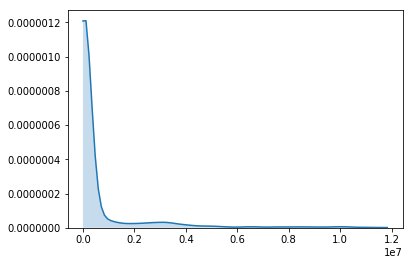

distributed.core - INFO - Event loop was unresponsive in Nanny for 158.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 159.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 159.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 158.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 158.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 159.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 159.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 159.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 159.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 159.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 33.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 33.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 33.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1228.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1228.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of dat

distributed.core - INFO - Event loop was unresponsive in Nanny for 1229.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1229.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1229.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1230.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1230.24s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 213.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 213.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data.

distributed.core - INFO - Event loop was unresponsive in Nanny for 213.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 213.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 213.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 213.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 213.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 51.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 51.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 51.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 51.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 51.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 51.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 5.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 9.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 34.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 7508.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7508.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7508.14s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7508.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7508.13s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 45859.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45858.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45859.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45858.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45858.94s.  This is often caused by long-running GIL-holding functions or moving large ch

distributed.core - INFO - Event loop was unresponsive in Nanny for 45860.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45860.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45860.14s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45860.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 45860.25s.  This is often caused by long-running GIL-holding functions or moving large ch

distributed.core - INFO - Event loop was unresponsive in Nanny for 36.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 36.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 36.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 36.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 36.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 3287.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3287.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3287.96s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3287.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3287.98s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 648.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 648.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 648.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 648.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 648.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 66.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 66.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

In [225]:
sns.kdeplot(og_df.var(axis = 1), cut = 0, shade = True)

In [136]:
df = pd.read_csv(f'./arath/arath.tpm.tsv', index_col = 0, sep = '\t')

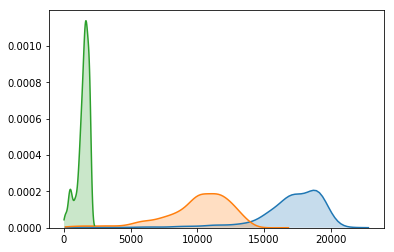

In [146]:
for cutoff in [1, 10 , 100]:
    sns.kdeplot((df > cutoff).sum(axis = 0), cut = 0, shade = True)

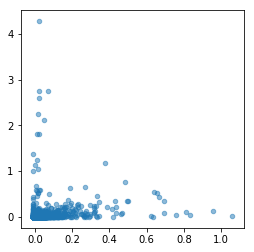

In [161]:
pca = PCA(n_components = 10, whiten = True)
components = pca.fit_transform(df.values)

fig,ax = plt.subplots(figsize=(4,4))

c = components[[c[0] < 1.5 and c[1] < 15 for c in components]]

ax.scatter(c.T[0], c.T[1], alpha = .5, s = 20)

array([[ 1.25335229e-02,  4.52064840e-01, -7.84830162e-03, ...,
        -2.32343279e-04, -3.56126228e-01,  5.35265050e-01],
       [-1.20663186e-02, -1.15762304e-02, -1.88513232e-02, ...,
         1.07765057e-02, -2.45267735e-01, -8.24337652e-02],
       [-1.19399878e-02, -8.29423334e-03,  2.56880184e-01, ...,
         6.61823149e-01, -2.41816685e-01,  1.83875669e+00],
       ...,
       [-1.09058167e-02, -1.18573768e-02, -4.72399771e-02, ...,
        -1.09803406e-02, -1.73564135e-01, -6.10501264e-02],
       [-8.75386432e-03, -8.25818192e-03, -2.31982914e-02, ...,
         4.69554905e-04, -2.09584599e-02,  5.90105105e-03],
       [-1.06239974e-02, -1.05464984e-02, -3.66998473e-02, ...,
        -3.10507800e-03, -1.74637497e-01, -4.57118995e-02]])

In [148]:
%%time

colors = dict(
    medtr = '#8e0152', #dark pink
    zizju = '#e6f5d0', #light green
    poptr = '#276419', #dark green
    cucsa = '#7fbc41', #medium green
    paran = '#de77ae', #medium pink
    glyma = '#fde0ef', #light pink
)
pca = PCA(n_components = 10, whiten = True)
components = pca.fit_transform(og_df.values)
print(components.shape)

KeyboardInterrupt: 

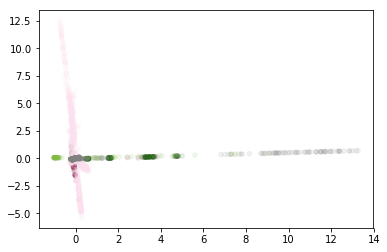

In [13]:
plt.scatter(components.T[4], components.T[5], alpha = .1, s = 20,
           c = [colors.get(g[:5], 'grey') for g in og_df.index])

CPU times: user 1min 16s, sys: 9.62 s, total: 1min 25s
Wall time: 1min 27s


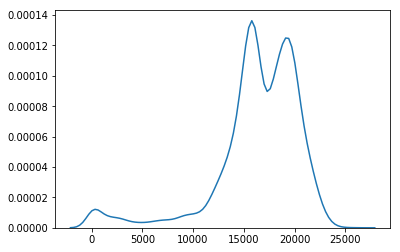

In [18]:
%%time
sns.kdeplot((og_df > 0).sum(axis = 1), shade = True)

CPU times: user 1min 20s, sys: 10.3 s, total: 1min 30s
Wall time: 1min 35s


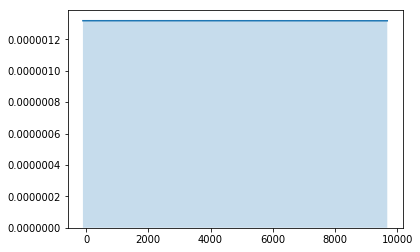

In [22]:
%%time
sns.kdeplot((og_df > 0).sum(axis = 0), 
            shade = True, cut = 0)

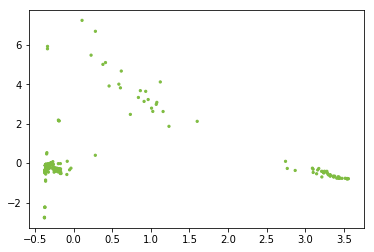

In [112]:
df = og_dfs['cucsa']

pca = PCA(n_components = 10, whiten = True)
components = pca.fit_transform(df.values)
plt.scatter(components.T[0], components.T[1], alpha = 1., s = 5,
           c = [colors.get(g[:5], 'grey') for g in df.index])

CPU times: user 932 ms, sys: 750 ms, total: 1.68 s
Wall time: 3.45 s


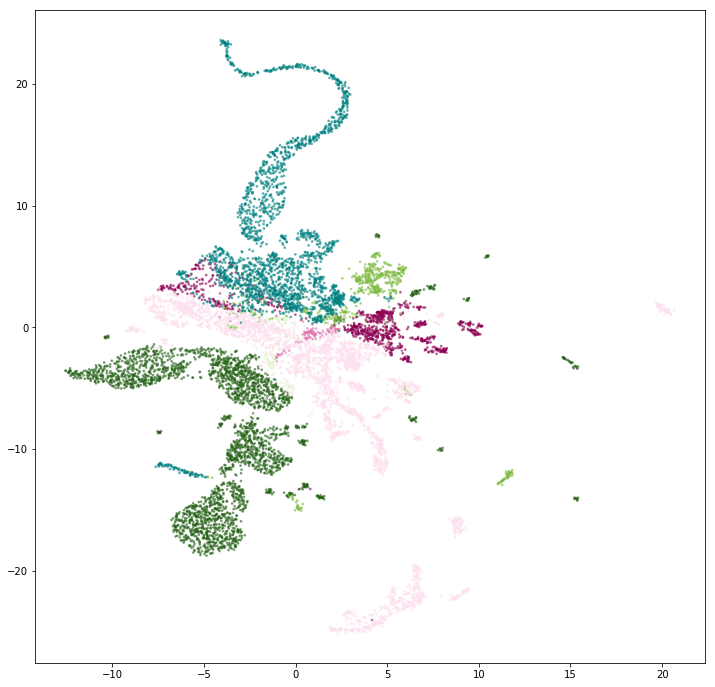

In [221]:
%%time
df = pd.read_csv('./embedding.tsv', sep = '\t', index_col = 0)

colors = dict(
    medtr = '#8e0152', #dark pink
    zizju = '#e6f5d0', #light green
    poptr = '#276419', #dark green
    cucsa = '#7fbc41', #medium green
    paran = '#de77ae', #medium pink
    glyma = '#fde0ef', #light pink
    arath = 'teal',
)
pca

fig,ax = plt.subplots(figsize=(12,12))

ax.scatter(df['UMAP1'], df['UMAP2'], alpha = .5, s = 3.,
           c = [colors.get(g[:5], 'grey') for g in df.index])

In [55]:
species = 'arath'

df = pd.read_csv(f'./{species}/{species}.tpm.tsv', 
                 index_col = 0, sep = '\t')

CPU times: user 12.3 s, sys: 1.34 s, total: 13.7 s
Wall time: 13.8 s


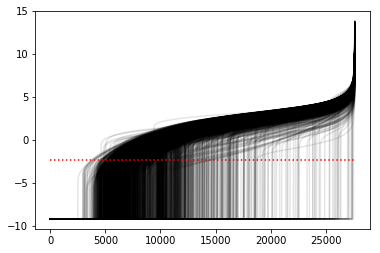

In [57]:
%%time
cutoff = np.log(.1)

for row in df:
    plt.plot(np.sort(np.log(df[row] + 1e-4)), 
             c = 'k', alpha = .1)

plt.plot((0, df.shape[0]), (cutoff, cutoff), 
     c = 'red', linestyle = ':')

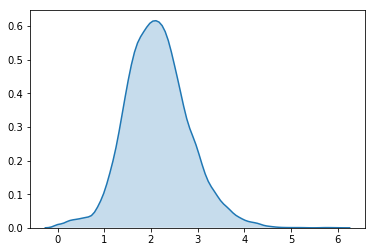

In [65]:
sns.kdeplot(np.log10(df.max(axis = 1) + 1), shade = True)

In [99]:
og_df.shape

(9688, 84181)

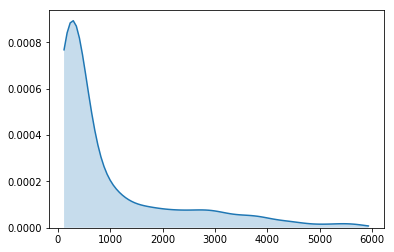

In [96]:
sns.kdeplot(df.std(axis = 0), shade = True, cut = 0)

In [192]:
from arboreto.algo import genie3, grnboost2, diy

RANDOM_STATE = 42

n_genes = 250
n_tfs = 25
n_samples = 100

sample = df.sample(n_genes, axis = 0, random_state = 42) \
    .sample(n_samples, axis = 1, random_state = 42)
tf_names = list(sample.sample(n_tfs, axis = 0).index)

In [190]:
%%time
default = grnboost2(expression_data = sample.T, 
                    tf_names = tf_names, 
                    seed = RANDOM_STATE)
print(default.shape)

(5780, 3)
CPU times: user 7.14 s, sys: 980 ms, total: 8.12 s
Wall time: 15.9 s


In [201]:
%%time

EARLY_STOP_WINDOW_LENGTH = 25

SGBM_KWARGS = {'learning_rate': 0.01,
 'n_estimators': 1,
 'max_features': 0.1,
 'subsample': 0.9}

custom = diy(expression_data = sample.T,
              regressor_type = 'GBM',
              regressor_kwargs = SGBM_KWARGS,
              tf_names = tf_names,
              early_stop_window_length = EARLY_STOP_WINDOW_LENGTH,
            seed = RANDOM_STATE)
print(custom.shape)

(1364, 3)
CPU times: user 5.15 s, sys: 794 ms, total: 5.94 s
Wall time: 7.87 s


In [220]:
np.log10(sample + 1e-9)

,mappings/single/SRR7970140/abundance,mappings/single/SRR7267099/abundance,mappings/single/SRR7267255/abundance,mappings/paired/SRR6023544/abundance,mappings/paired/SRR6023543/abundance,mappings/paired/SRR4254438/abundance,mappings/single/SRR7267084/abundance,mappings/paired/SRR2953689/abundance,mappings/single/SRR6473508/abundance,mappings/single/SRR7267294/abundance,...,mappings/single/SRR7160661/abundance,mappings/single/SRR1661484/abundance,mappings/paired/SRR5242376/abundance,mappings/single/SRR7266016/abundance,mappings/paired/SRR6852086/abundance,mappings/paired/SRR3125004/abundance,mappings/single/SRR7267275/abundance,mappings/paired/SRR6029233/abundance,mappings/single/SRR5581453/abundance,mappings/single/SRR7267310/abundance
target_id,,,,,,,,,,,,,,,,,,,,,
AT5G24600,-0.034541,0.812605,1.246481,1.071101,0.853278,-0.639819,0.516849,-9.000000,0.085622,-9.000000,...,0.211457,-0.937403,0.120251,0.378298,-1.239221,1.521103,-9.000000,0.040507,-9.000000,-9.000000
AT5G43330,1.265744,0.650491,0.783340,0.891207,1.098509,1.368458,1.284155,1.335600,1.321447,0.928212,...,1.982831,1.251967,1.817034,0.517216,0.953636,1.229828,1.258199,1.779284,0.934146,1.525177
AT5G16630,0.926260,1.222498,0.355346,1.034500,0.952344,0.708842,1.746286,0.706539,1.140005,1.199190,...,0.735294,1.176641,0.835205,0.390253,0.628117,1.050921,0.971535,0.487790,0.943100,1.449366
AT2G05330,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-0.063633,-9.000000,...,-9.000000,-9.000000,-0.910314,-9.000000,-9.000000,-0.120384,-9.000000,-0.082981,0.005652,-9.000000
AT2G26510,1.342012,1.645856,1.000551,1.223480,1.237795,1.407658,1.256196,1.247303,1.631099,0.969335,...,1.443291,1.798939,1.453497,1.102406,0.733863,1.625629,1.361469,0.816617,1.197639,1.598969
AT4G27890,-9.000000,-9.000000,-9.000000,-9.000000,-1.259844,-9.000000,-9.000000,-9.000000,0.332311,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-0.289247,-9.000000,-0.441213,-9.000000,-9.000000
AT3G26490,0.277063,0.799697,-9.000000,0.414418,0.246319,0.882832,0.202910,0.507157,0.512739,-9.000000,...,0.659280,0.625648,0.449137,-9.000000,0.645330,0.702707,-0.183660,0.407267,0.340365,0.567173
AT5G25320,-9.000000,-9.000000,-9.000000,-1.308940,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-0.444434
AT5G65860,0.857958,1.257086,-9.000000,0.775079,0.641380,0.966573,1.058240,0.894195,1.388861,-9.000000,...,1.023915,1.576190,1.051430,0.521750,0.846039,1.183995,0.750849,1.604065,0.870860,1.045749


distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.44s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6253.61s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.34s.  This is often caused by long-running GIL-holding functions or moving large ch

distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 50359.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 26.31s.  This is often caused by long-running GIL-holding functions or moving large chunk

distributed.core - INFO - Event loop was unresponsive in Nanny for 26.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 26.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 26.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 26.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 26.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.58s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4532.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1753.08s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1753.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1753.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1753.78s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1753.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1753.58s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 47.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 47.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 47.96s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


No handles with labels found to put in legend.


[[83, 93, 103, 113, 122, 129, 135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 178, 181, 184, 187, 189, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208], [83, 93, 103, 113, 122, 129, 135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 178, 181, 184, 187, 189, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208], [33, 43, 53, 63, 72, 79, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 128, 131, 134, 137, 139, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158], [150, 170, 170, 170, 190, 190, 190, 210, 210, 230, 230, 230, 230, 240, 240, 240, 240, 250, 250, 250, 250, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260], [150, 170, 170, 170, 190, 190, 190, 210, 210, 230, 230, 230, 230, 240, 240, 240, 240, 250, 250, 250, 250, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260]]


{'whiskers': [<matplotlib.lines.Line2D at 0x120c26320>,
 'caps': [<matplotlib.lines.Line2D at 0x120f97390>,
 'boxes': [<matplotlib.lines.Line2D at 0x120c2ebe0>,
 'medians': [<matplotlib.lines.Line2D at 0x120f97a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x120f97d68>,
 'means': []}

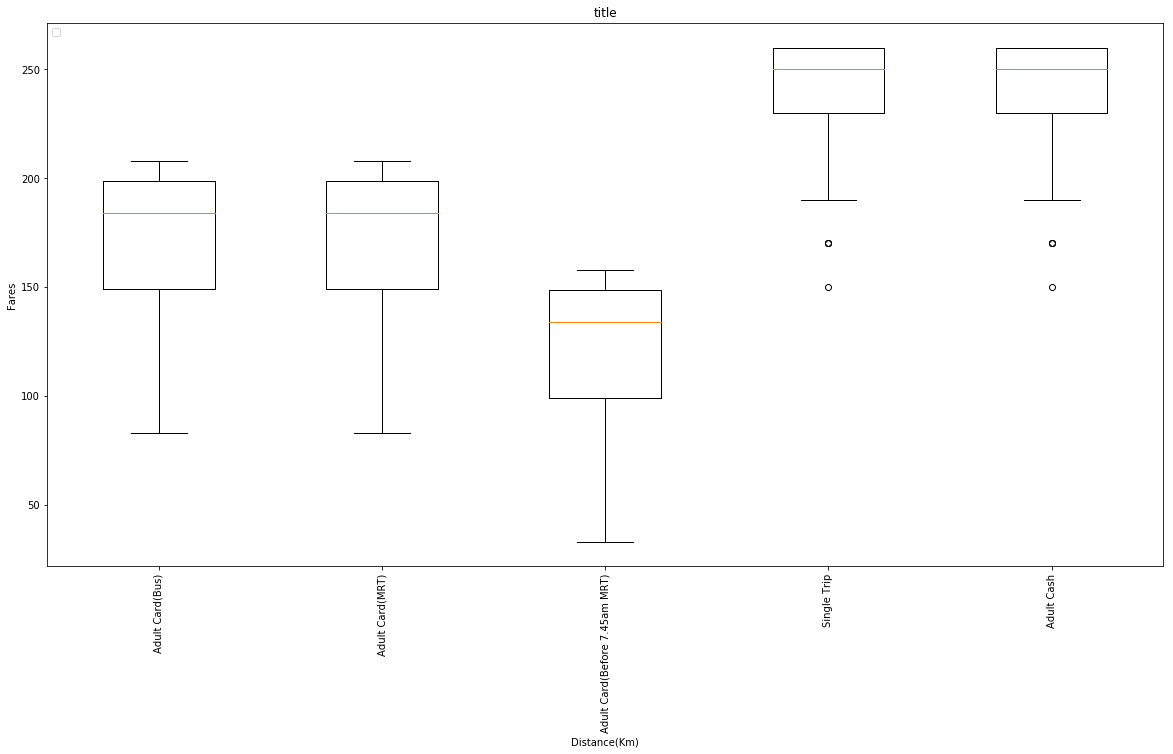

In [9]:
import numpy as np
from matplotlib import pyplot as plt

mydata = [[83,93,103,113,122,129,135,139,143,147,151,155,159,163,167,171,175,178
,181,184,187,189,191,193,194,195,196,197,198,199,200,201,202,203,204,205
,206,207,208]
,[83,93,103,113,122,129,135,139,143,147,151,155,159,163,167,171,175,178
,181,184,187,189,191,193,194,195,196,197,198,199,200,201,202,203,204,205
,206,207,208]
,[33,43,53,63,72,79,85,89,93,97,101,105,109,113,117,121,125,128
,131,134,137,139,141,143,144,145,146,147,148,149,150,151,152,153,154,155
,156,157,158]
,[150,170,170,170,190,190,190,210,210,230,230,230,230,240,240,240,240,250
,250,250,250,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
,260,260,260]
,[150,170,170,170,190,190,190,210,210,230,230,230,230,240,240,240,240,250
,250,250,250,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
,260,260,260]]
labels = np.array(["Adult Card(Bus)","Adult Card(MRT)","Adult Card(Before 7.45am MRT)","Single Trip", "Adult Cash"])
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_xticklabels(labels, rotation='vertical')
plt.title('title')
plt.xlabel('Distance(Km)')
plt.ylabel('Fares')
plt.legend(loc='upper left');
print(mydata)
plt.boxplot(mydata,labels=labels)
#plt.show()